INTAROS - IMR Dataset - Case Study
============================

**authors**: D. Renard, F. Ors

**date**: January 22nd 2019

# Introduction

This paper is meant to demonstrate how to use a simple **Kriging interpolation** from the **RGeostats** package applied to the **Annual CTD datasets** from Norwegian Institute of Marine Research (IMR).

This notebook has been obtained by running the following command:

<pre>notedown rmd/imr_case_study.Rmd --rmagic > imr_case_study.ipynb</pre>

The data set are NetCDF files (\*.nc) with following variables:
* LATITUDE: Latitude (degrees) of the vessel position. 1D size = {Nb Positions}
* LONGITUDE: Longitude (degrees) of the vessel position. 1D size = {Nb Positions}
* TIME: Time of the position (number of days since January 1st, 1950). 1D size = {Nb Positions}
* DEPH: Depth of each measure (m). 2D size = {Nb Positions, Nb Measures}
* TEMP: Temperature (°C). 2D size = {Nb Positions, Nb Measures}
* CNDC: Electrical conductivity (S m-1). 2D size = {Nb Positions, Nb Measures}
* PSAL: Sea water practical salinity (0.001). 2D size = {Nb Positions, Nb Measures}

## Definition of the environment

The next cells have specific contents that the user must choose to run or to skip. Their order is important.

- Loading the library **Intaros**

In [52]:
suppressWarnings(suppressPackageStartupMessages(library(RIntaros)))

- Cleaning the workspace: this paragraph is not systematically performed.

In [53]:
rm(list=ls())

- Defining if the data set must be read or not from the CSV (**flag.read**)

In [54]:
flag.read = FALSE

## Loading Data

First of all, we setup some environment variables (data file name and bounding box).
The **flag_file** allows the user to store each generated graphic file as a **PNG** file in the **image_name** directory, instead of plotting them.

In [55]:
# Setup environment
dir.name   = "/workspace/INTAROS/iaos-showcase-app-Barents-Sea-CTD" #getwd()
file.name  = "imr_data_0_to_100m.csv"
data.name  = "data"
image.name = "images"
long_lim   = c(-20,60)
lat_lim    = c(52,83)
intaros.save.environ(long_lim = long_lim, lat_lim = lat_lim,
                     flag_file = FALSE) #,image_name = file.path(dir.name,image.name))

Then we read the **CSV** file (taking the header line into account) and create the RGeostats Db. Finally we show the contents of the newly created Db (named **db0**).

In [56]:
if (flag.read || ! exists("db0")) db0 = imr_read_csv(file.path(dir.name,data.name,file.name))
db0


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of fields             = 10
Maximum Number of attributes = 10
Total number of samples      = 5554585

Variables
---------
Field =   1 - Name    =  rank - Locator =  NA
Field =   2 - Name    =  Longitude - Locator =  x1
Field =   3 - Name    =  Latitude - Locator =  x2
Field =   4 - Name    =  Depth - Locator =  NA
Field =   5 - Name    =  Temperature - Locator =  NA
Field =   6 - Name    =  Conductivity - Locator =  NA
Field =   7 - Name    =  Salinity - Locator =  NA
Field =   8 - Name    =  Time - Locator =  NA
Field =   9 - Name    =  Profil_id - Locator =  NA
Field =  10 - Name    =  Vaissel_id - Locator =  NA

## Dataset global statistics

We first establish the time amplitude of the dataset, as well as a set of colors assigned to each year.

In [57]:
years      = subyears = get_db_limits_year(db0)
trimesters = subtrims = seq(1,4)
colyears   = rg.colors(length(years))
cat(build_title("The dataset period is:",time2date(get_db_limits_time(db0))))

The dataset period is: (1995-01-07 => 2016-11-29)

Let us get some statistics on the information available

In [58]:
db.stat.print(db0,funs=c("num","mini","maxi","mean"),
              names=c("Longitude","Latitude","Depth","Temperature","Conductivity","Salinity"))

                Number   Minimum   Maximum      Mean
Longitude      5554585   -19.995    59.500    11.952
Latitude       5554585    52.000    82.107    67.021
Depth          5554585     0.000   100.000    49.501
Temperature    5554574    -2.027    23.144     6.510
Conductivity   5543746    -0.008    49.821    34.464
Salinity       5543757    -0.000    51.512    34.525



# Studying Temperature variable

From this point, most of the calculations will be performed based on the **Temperature** variable.

## All Database

We display all samples focusing on the variable in a 2D aerial view, reporting the country borders. For comparison, we define a common color scale, established on the global minimum and maximum values (**var_scale0**).
Note that all samples from all years and all depths are displayed (slow operation).

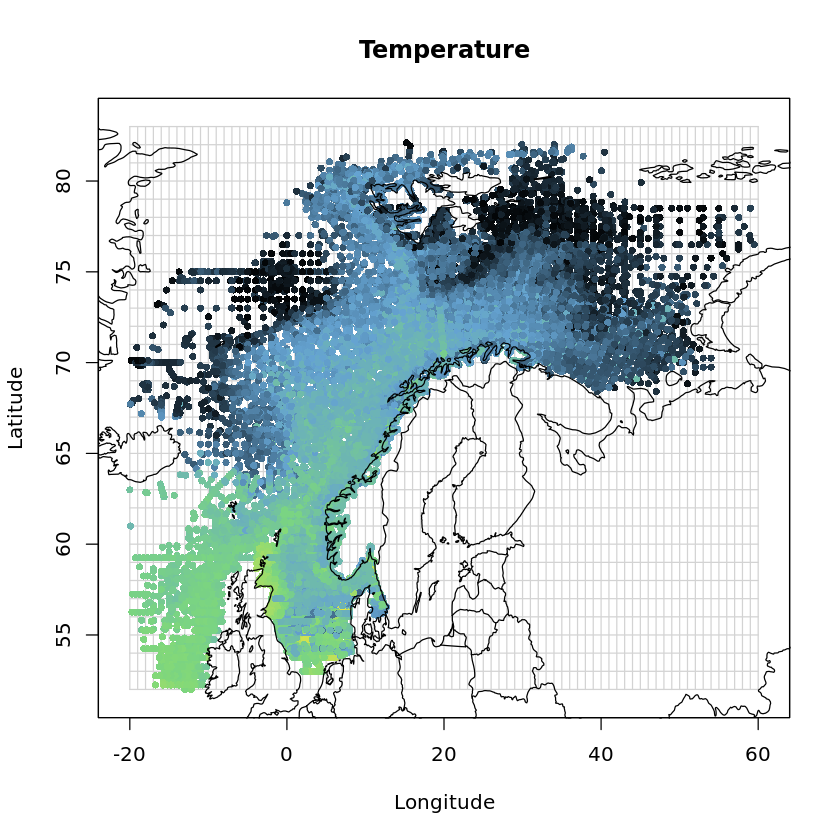

In [59]:
var = "Temperature"
colors.temp = rg.colors(rank=1)
var_scale0 = get_db_limits_var(db0,var)
display_var(db0, var = var, colors = colors.temp, title = var, filename = var)

## Different Projections

We can also benefit from different projections as demonstrated next.

In [ ]:
var = "Temperature"
filename = paste0(var," - Projection Gnomonic")
projec.define(projection="gnomonic")
display_var(db0, var = var, colors = colors.temp, title = filename, filename = filename)
filename = paste0(var," - Projection Mecca[10]")
projec.define(projection="mecca",parameters=10)
display_var(db0, var = var, colors = colors.temp, title = filename, filename = filename)
projec.toggle(0)

## Year Campaign

We display Temperature values for the year 1995 only.

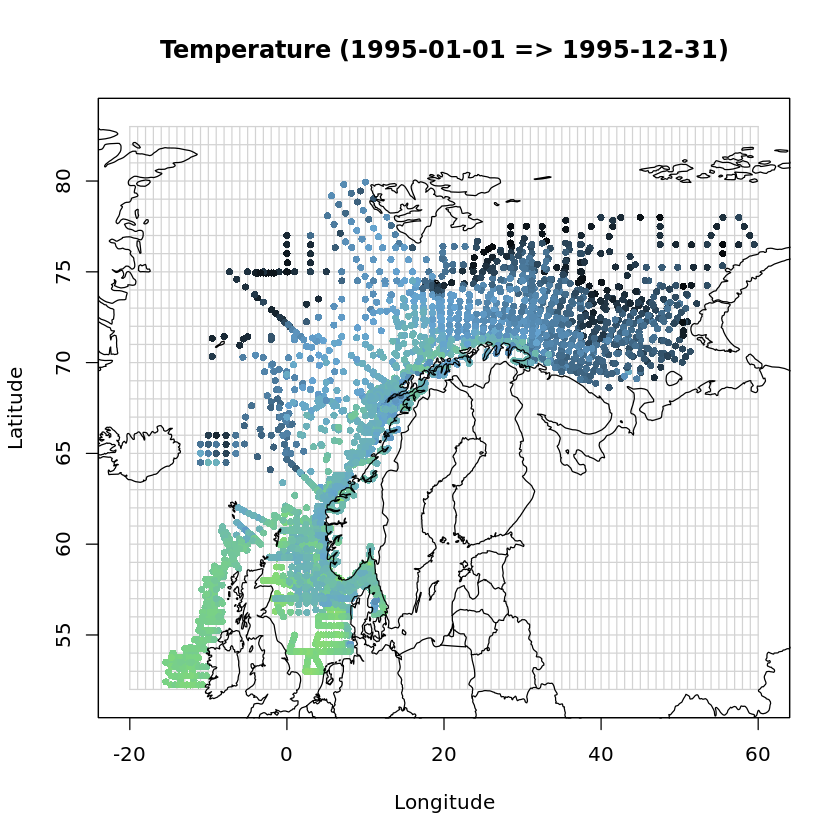

In [60]:
var = "Temperature"

# Comment the following line if you want to to display all years
subyears = years[1]

# Loop on the years to be displayed
for (year in subyears) 
{
  date_lim  = create_limits_date(year)
  db        = apply_sel(db0, date_lim=date_lim)
  filename  = paste0(var,"_Year_",year)
  title     = build_title(var, date_lim)
  display_var(db, var, var_scale = var_scale0, colors = colors.temp, 
              title = title, filename = filename)
}

## Year/Trimester at 20m Depth

Display data for the first trimester of the year 1995 focusing on data at 20m depth exactly.

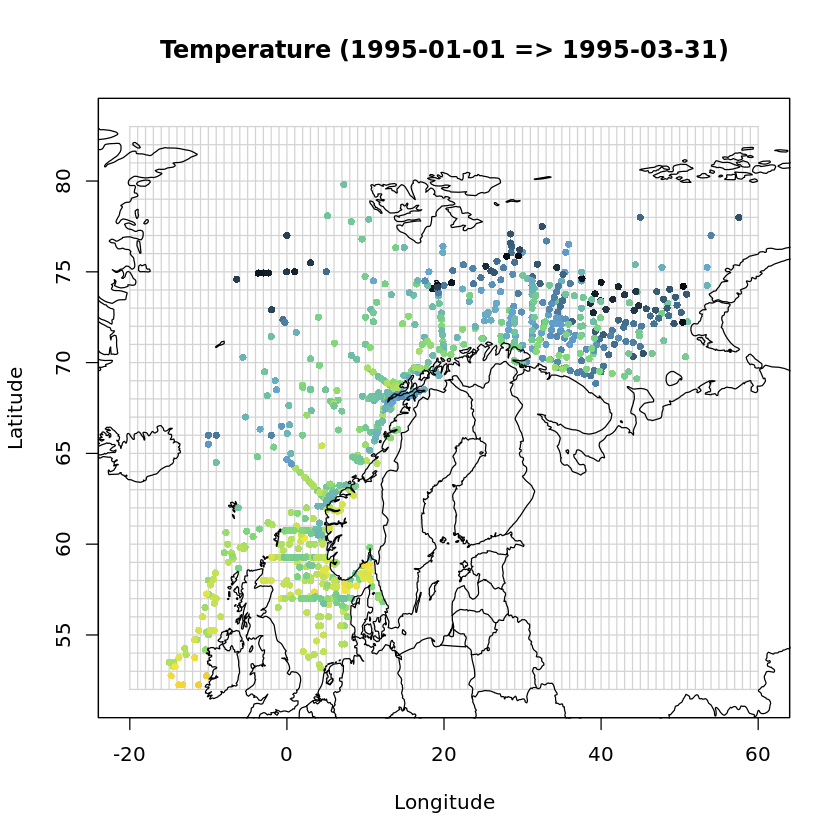

In [61]:
var = "Temperature"

# Select samples at depth 20m and set the color scale
db1       = apply_sel(db0, depth_lim=c(20,20), compress = TRUE)
var_scale = get_db_limits_var(db1,var)

# Comment the following lines if you want to to display all trimesters / years
subyears = years[1]
subtrims = trimesters[1]

# Loop on the years / trimesters to be displayed
for (year in subyears) 
  for (itri in subtrims)
  {
    date_lim  = create_limits_date(year, trimester=itri)
    db        = apply_sel(db1,date_lim=date_lim)
    filename  = paste0(var,"_Trim_",year,"_T",itri)
    title     = build_title(var, date_lim)
    display_var(db, var,  var_scale = var_scale, colors = colors.temp,
                title = title, filename = filename)
  }

## Block Average at 20m Depth

The next display considers the variable (at 20m depth exactly) averaged over the cells of a coarse grid (mesh of 1 degree).

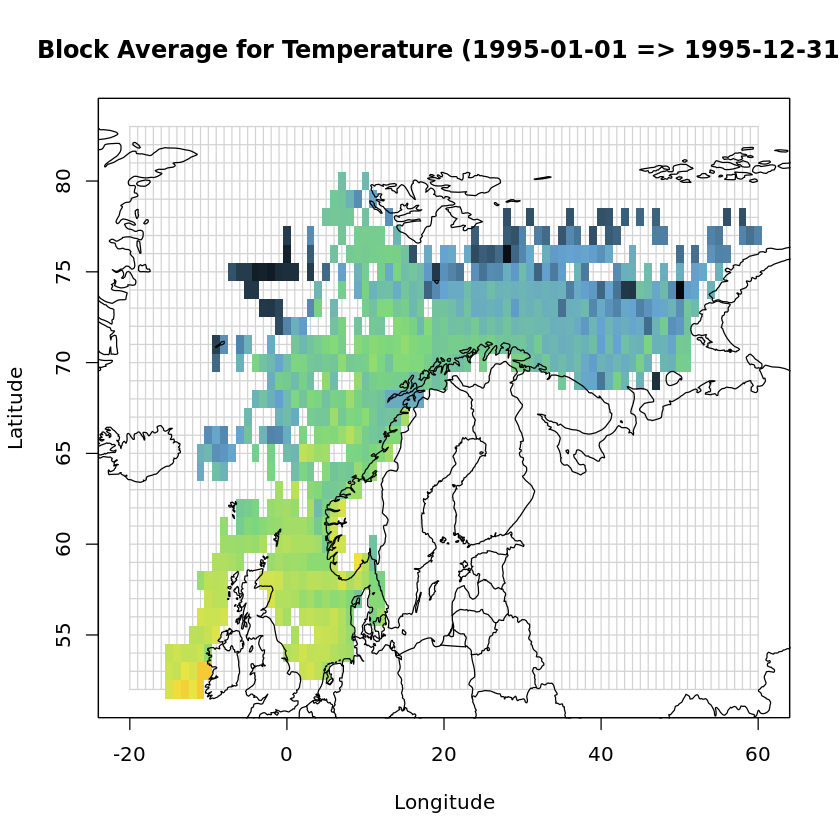

In [62]:
var = "Temperature"

# Select samples at depth 20m and set the color scale
db1       = apply_sel(db0, depth_lim=c(20,20),compress = TRUE)
var_scale = get_db_limits_var(db1,var)

# Comment the following line if you want to to display all years
subyears = years[1]

# Loop on the years
for (year in subyears) 
{
  date_lim  = create_limits_date(year)
  db        = apply_sel(db1, date_lim=date_lim)
  filename  = paste0(var,"_Mean_",year)
  title     = paste("Block Average for", build_title(var, date_lim))
  dbg       = stats_grid(db, var, fun = "mean", mesh = 1)
  display_stats(dbg, var, var_scale = var_scale, colors = colors.temp,
                title = title, filename = filename)
}

# Restriction of the area of interest

In the next operations, we focus on a restricted area located in the South West of Norway. The new Db will be called **dbloc**.

In [63]:
# Focus to South West of Norway (new global environement)
long_lim = c(-2,10)
lat_lim  = c(56,62)
dbloc    = apply_sel(db0, long_lim = long_lim, lat_lim = lat_lim, compress = TRUE)
intaros.save.environ(long_lim = long_lim, lat_lim  = lat_lim)

## Histogram of Measurement Depths

We also aggregate the values of all samples vertically from 0m by 10 steps of 10m.
Then, we can double-check this regularization step by plotting the histogram of the initial depths and the histogram of the depths in the aggregated file.

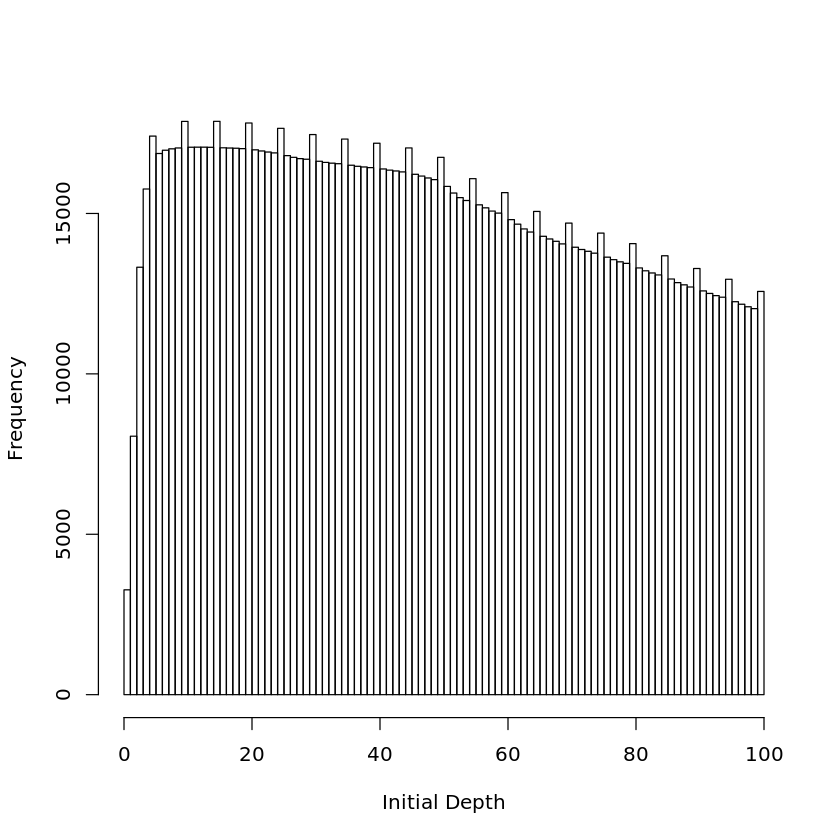

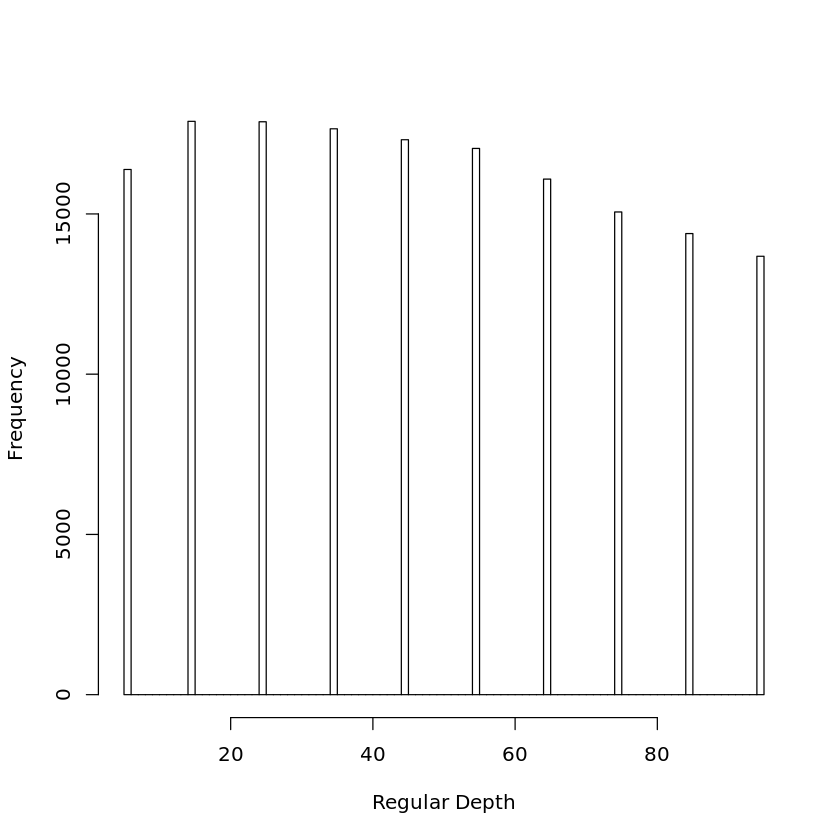

In [64]:
# Aggregate along depth from 0 to 100m, by steps of 10m
dbreg = aggregate_depth(dbloc, depth0 = 0, ddepth = 10, ndepth = 10, flag.center = TRUE)

# Histogram of depths
hist(dbloc[,"Depth"],breaks=100,xlab="Initial Depth",main="")
hist(dbreg[,"Depth"],breaks=100,xlab="Regular Depth",main="")

## Statistics per Year

Calculate the mean and the variance of the Temperature for each year, starting from the depth-aggregated data. We focus on the samples located at 25m depth. We can compare the mean and variance to the one calculated on the initial data (before aggregation)

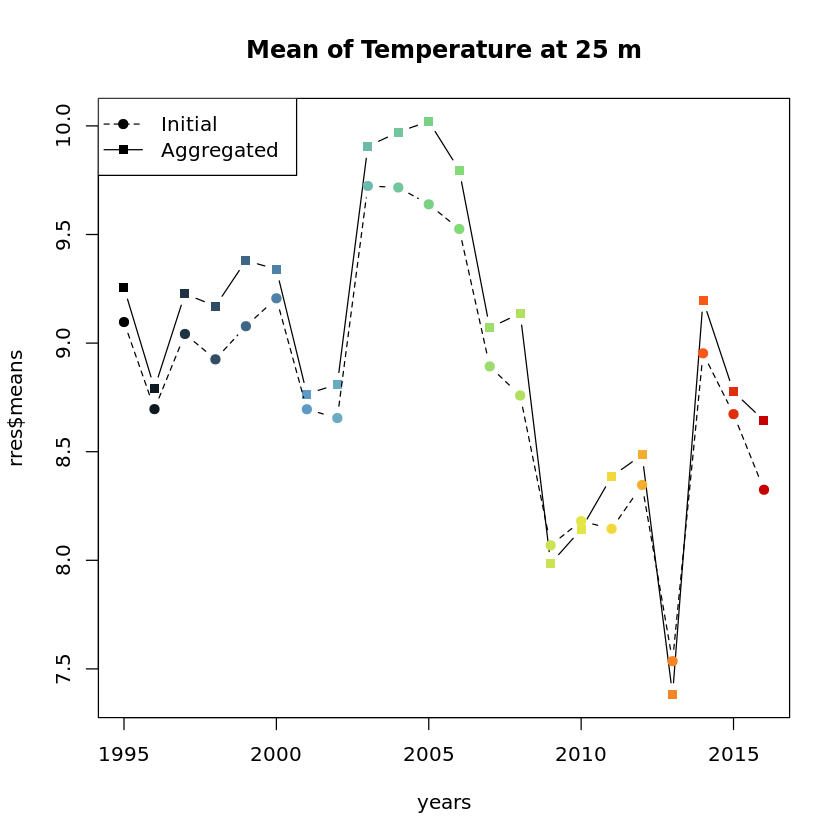

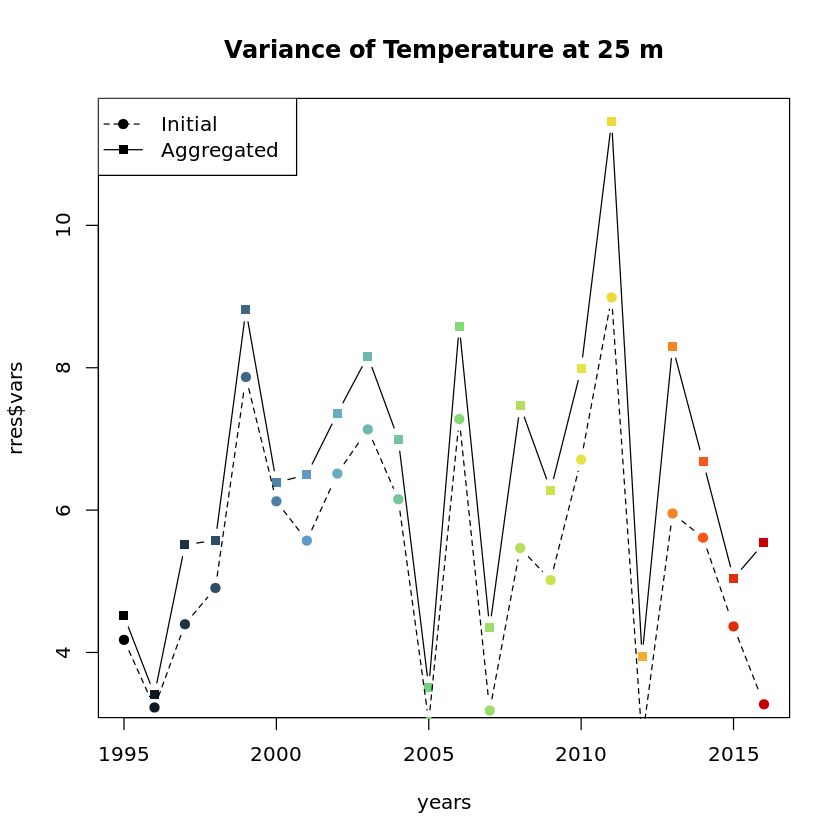

In [65]:
var       = "Temperature"
depth     = 25

# Focus at 25m depth exactly
depth_lim = c(depth,depth)
dbc       = apply_sel(dbloc, depth_lim = depth_lim, compress = TRUE)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, compress = TRUE)

# Average Temperature along time (by year) at 25m depth
cres      = average_time(dbc, var, years)
rres      = average_time(dbr, var, years)

# Display means
plot (years,rres$means,type="b",main=paste("Mean of",var,"at",depth,"m"),pch=15,lty=1,col=colyears)
lines(years,cres$means,type="b",pch=19,lty=2,col=colyears)
legend("topleft",legend=c("Initial","Aggregated"),lty=c(2,1),pch=c(19,15))

# Display variances
plot (years,rres$vars ,type="b",main=paste("Variance of",var,"at",depth,"m"),pch=15,lty=1,col=colyears)
lines(years,cres$vars ,type="b",pch=19,lty=2,col=colyears)
legend("topleft",legend=c("Initial","Aggregated"),lty=c(2,1),pch=c(19,15))

# Store the maximum variance for further use
varmax = 1.2 * max(rres$vars)

## Statistics per Depth 

Consider year 2008 and evaluate the mean and variance of the Temperature per depth level (every 10m). Calculations are performed starting from the initial data set.

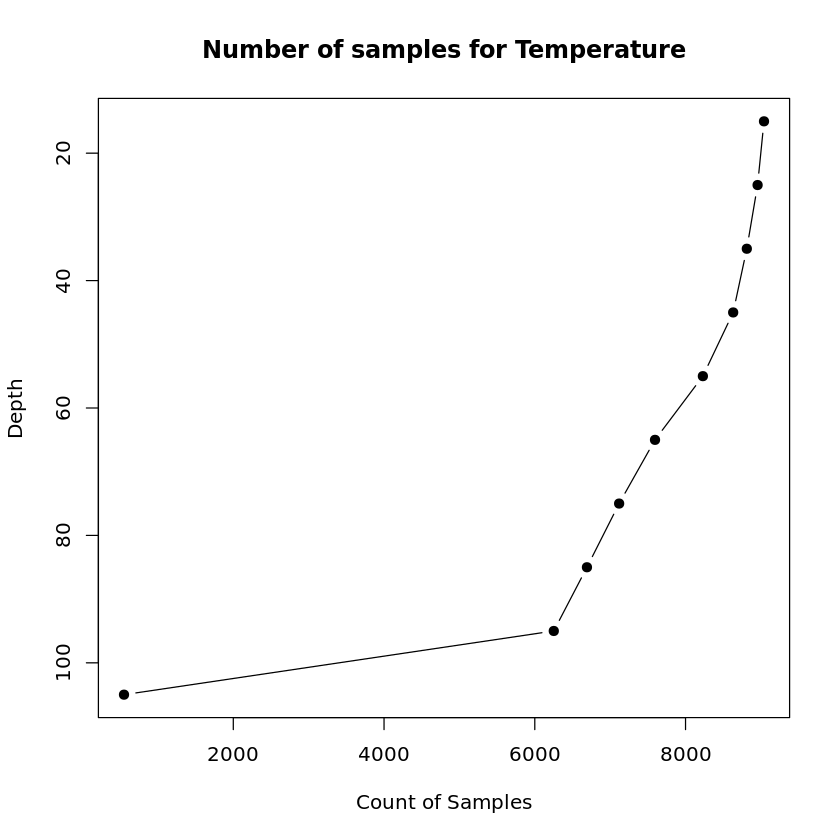

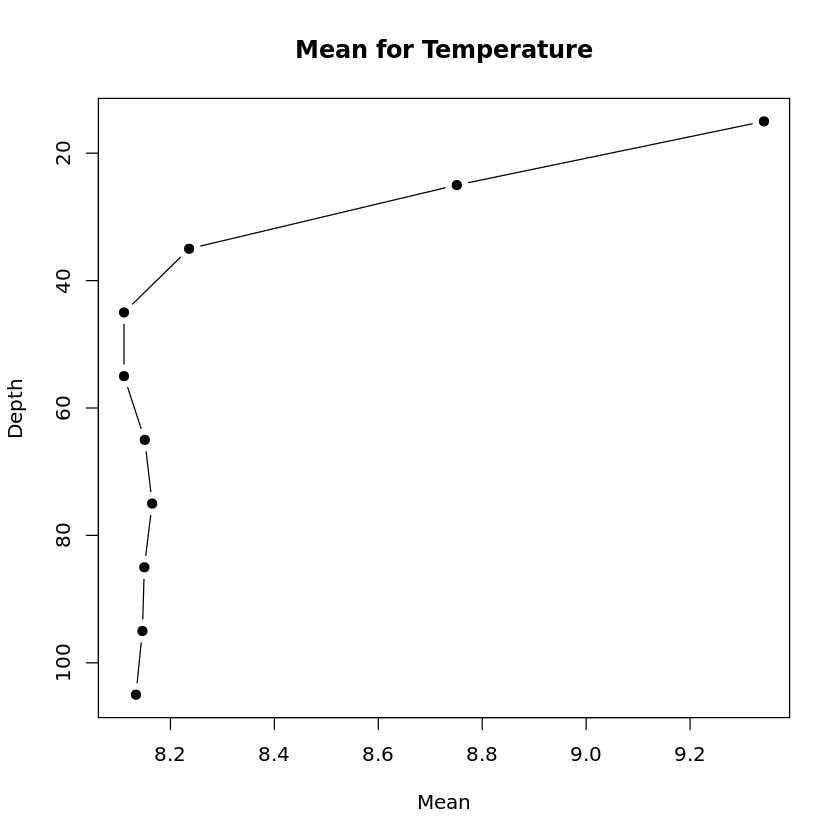

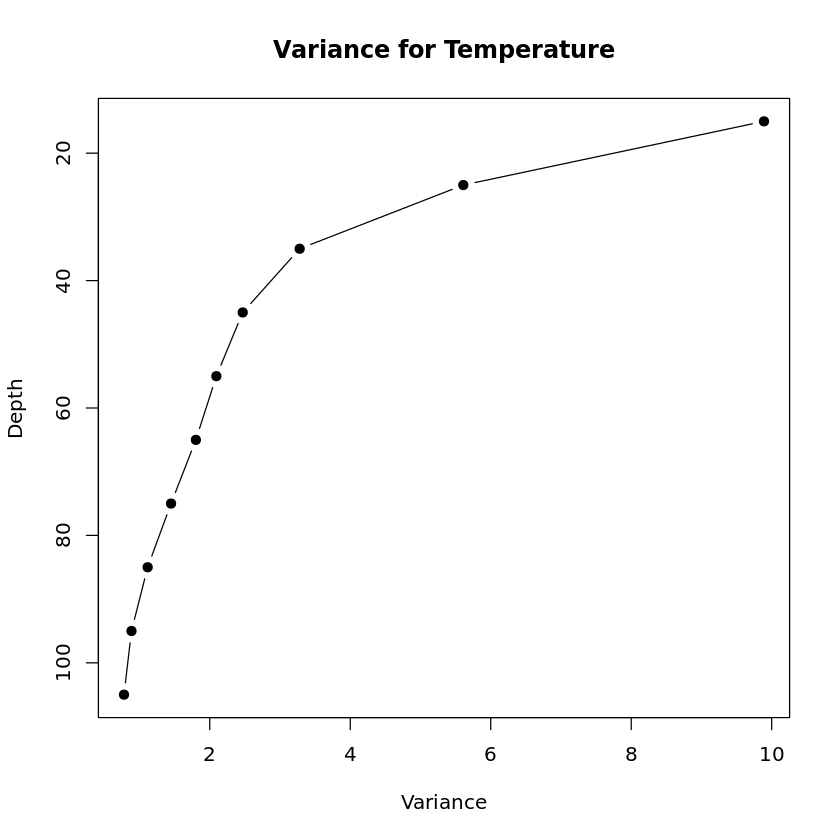

In [66]:
var       = "Temperature"
year      = 2008

# Average Temperature by depth
date_lim  = create_limits_date(year)
db1       = apply_sel(dbloc, date_lim = date_lim, compress = TRUE)
res       = average_depth(db1, var, depth0 = 0, ddepth = 10, ndepth = 10)

# Display statistics
plot(res$count,res$depths,type="b",main=paste("Number of samples for",var),pch=19,
     xlab="Count of Samples", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$means,res$depths,type="b",main=paste("Mean for",var),pch=19,
     xlab="Mean", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$vars ,res$depths,type="b",main=paste("Variance for",var),pch=19,
     xlab="Variance", ylab="Depth", ylim=rev(range(res$depths)))

## Regularization along Time

Starting from the initial data base, regularize the Temperature every 30 days by calcuting its mean for each interval

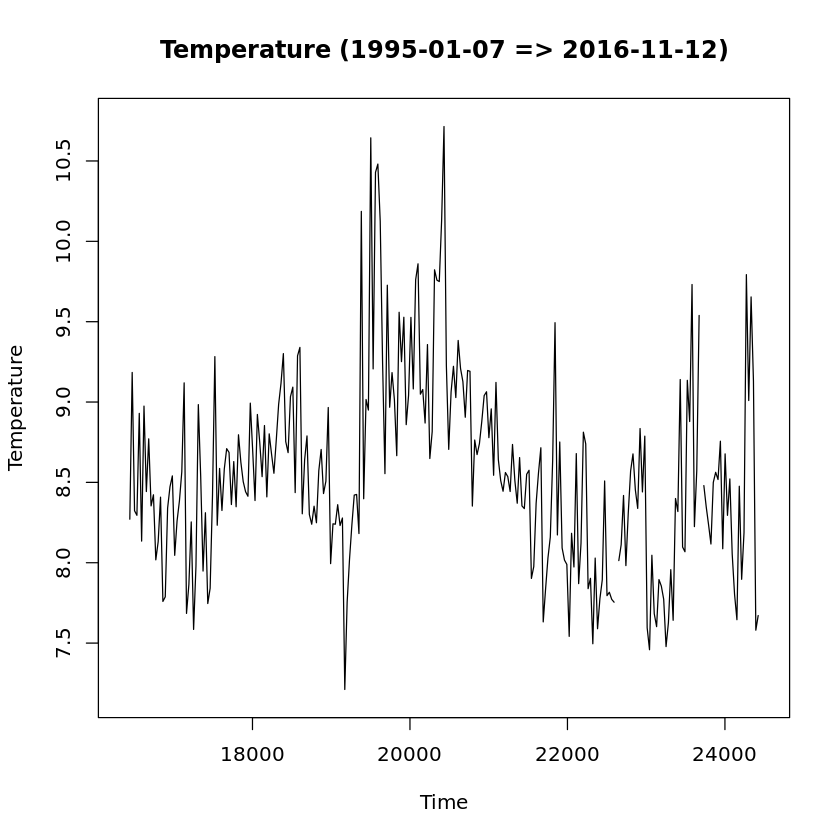

In [67]:
var = "Temperature"

# Regularize Temperature along Time
dbg = regular_time(dbloc, var, time_step = 30)

# Display regularized 1-D database along time
plot(dbg, title = build_title_db_time(dbg,var), xlab = "Time", ylab = var)

## Regularization along Depth

Starting from the initial data base, regularize the Temperature every 2m depth

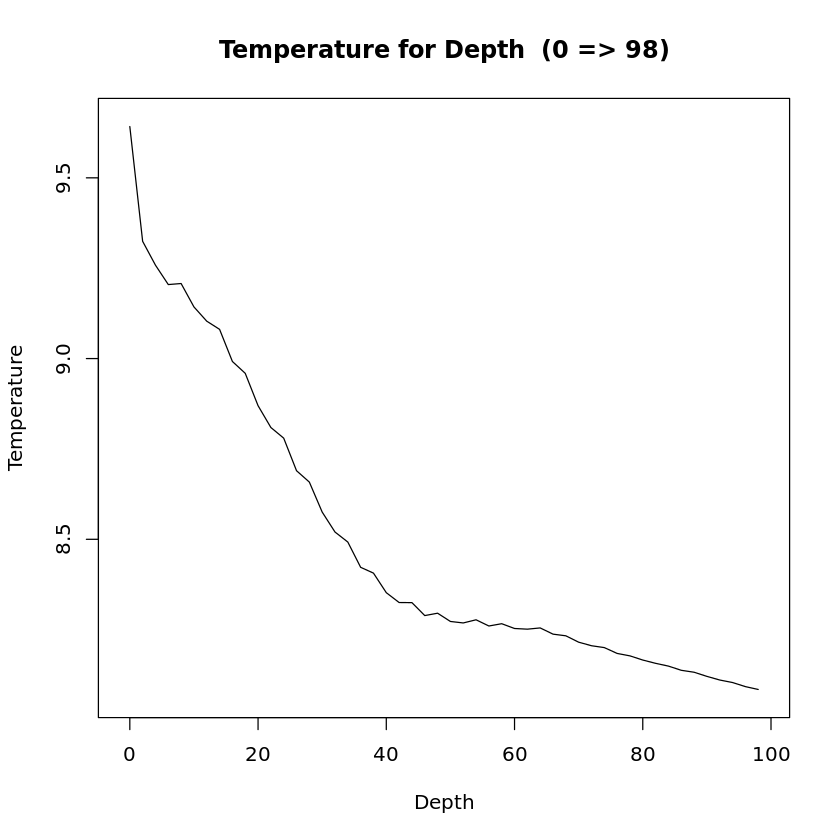

In [68]:
var = "Temperature"

# Regularize Temperature along Depth
dbg = regular_depth(dbloc, var, depth_step = 2)

# Display regularized 1-D database along depth
plot(dbg, title=build_title_db_depth(dbg,var), xlab="Depth", ylab = var)

## Horizontal Variogram per Year

Review the horizontal variograms for different years at 25m depth, calculated from the aggregated data set.

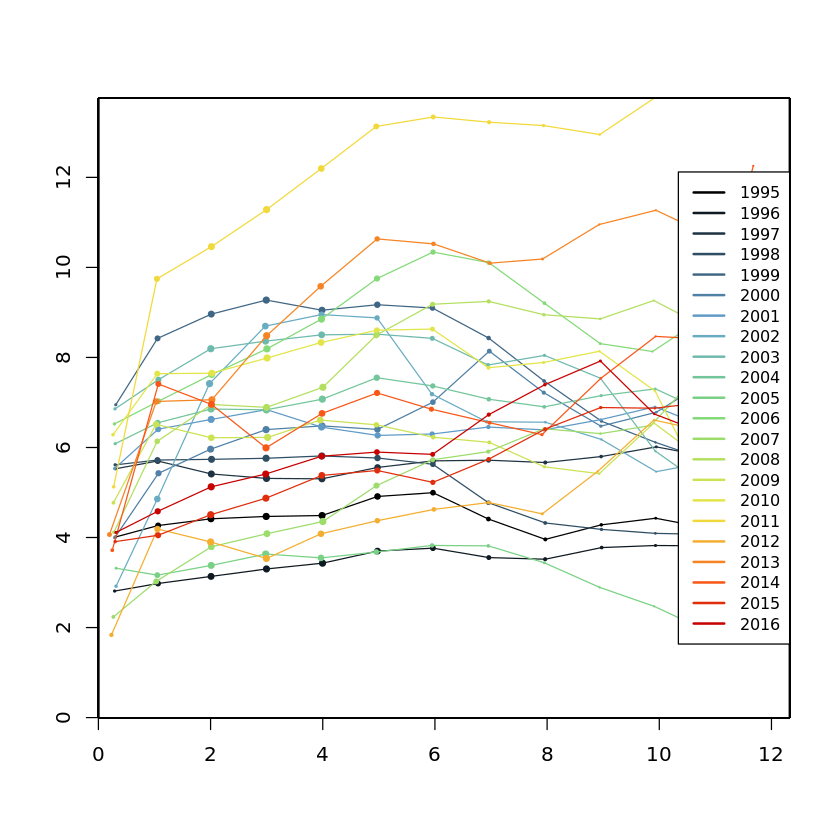

In [69]:
var       = "Temperature"
depth     = 25

# Define the active samples
depth_lim = c(depth,depth)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, compress = TRUE)
dbr       = db.locate(dbr,var,"z")

# Variogram parameters
vario_lag  = 1
vario_nlag = 20

# Loop on the years
ecr = 1
add = FALSE
for (year in years) 
{
  date_lim = create_limits_date(year)
  dbr = remove_sel(dbr)
  dbr = apply_sel(dbr, date_lim = date_lim)

  vario = prepar_vario(dbr, dirvect=NA, 
                       vario_lag = vario_lag, vario_nlag = vario_nlag, draw.vario=TRUE,
                       add=add, ylim=c(0,varmax), col=colyears[ecr], lwd=1,
                       varline=FALSE, npairdw=TRUE)

  ecr = ecr + 1
  add = TRUE
}
legend("right",legend=years,col=colyears,lty=1,lwd=2,cex=0.8)

## Cross-Validation

We first perform a cross-validation step


Cross-Validation Scores
-----------------------
                             Number      Mean  Variance
Xvalid.Temperature.esterr       280    -0.029     6.281
Xvalid.Temperature.stderr       280    -0.006     1.133



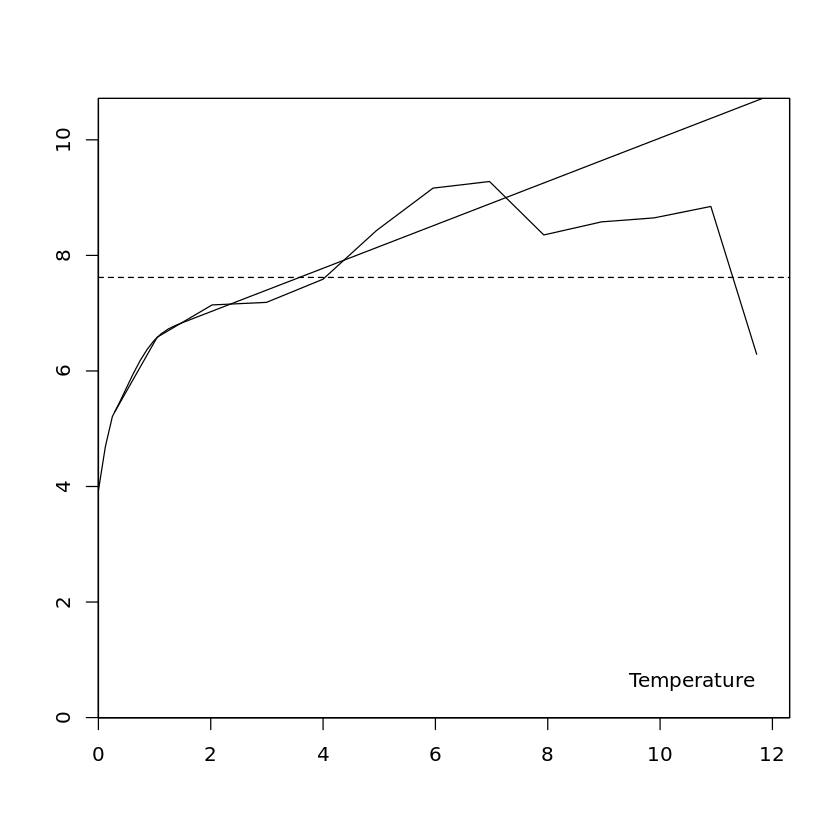

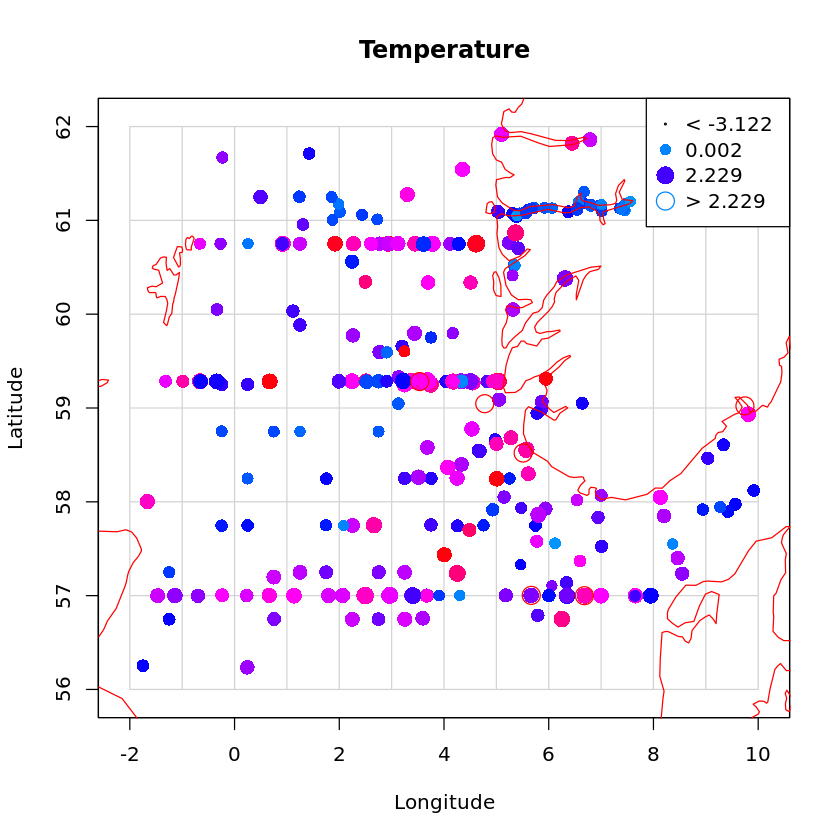

In [50]:
var       = "Temperature"
year      = 2008
depth     = 25

# Define the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, date_lim = date_lim, compress = TRUE)

# Variogram parameters
vario_lag  = 1
vario_nlag = 20

# Perform the Cross-validation (includes Variogram calculation and Model fitting)
dbp = xvalid_2D(dbr, var,  
                vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                dirvect = NA, draw.model=TRUE, radix="Xvalid")
db.stat.print(dbp,names="Xvalid*",funs=c("num","mean","var"),title="Cross-Validation Scores")

# Display the results
filename  = paste0("Xvalid_",var)
display_var(dbp, var = "*stderr", flag.xvalid = TRUE, colors = rainbow(100),
            title = var, filename = filename, pos.legend=7)

## 2-D Estimation of Temperature

We interpolate the Temperature for the second trimester of year 2008, at the depth of 25m. This interpolation starts from the aggregated data.

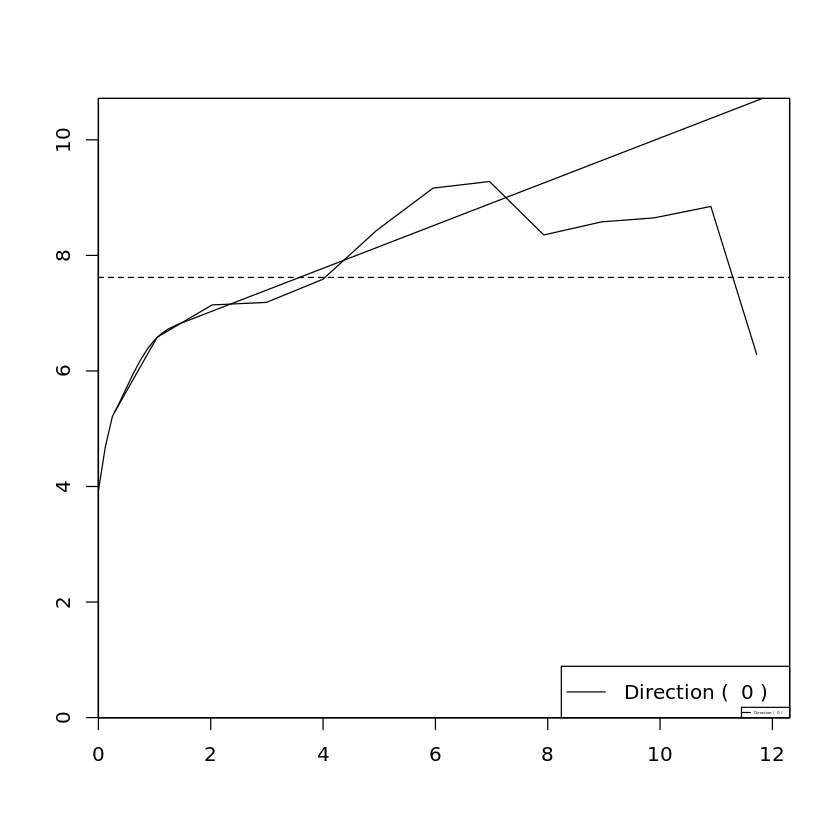

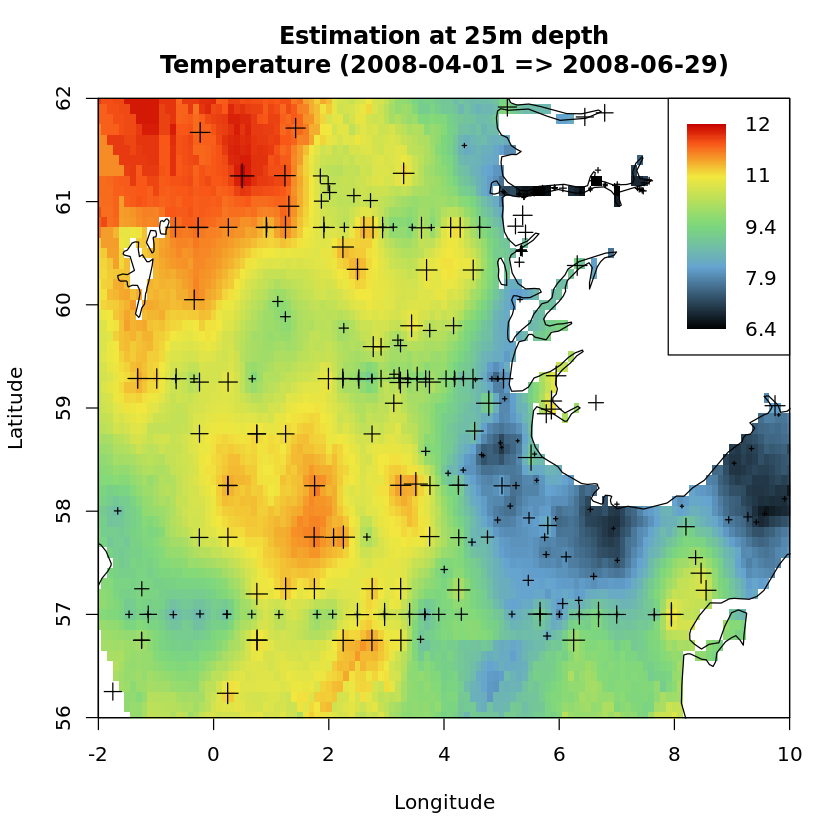

In [51]:
var       = "Temperature"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, date_lim = date_lim, compress = TRUE)

# Variogram parameters
vario_lag  = 1
vario_nlag = 20

# Perform the interpolation (includes Variogram calculation and Model fitting)
dbg = interpolate_2D(dbr, var, mesh = 0.1, 
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                     dirvect = NA, draw.model=TRUE, pos.legend=1)

# Display the results
filename  = paste0(var,".Estim2D_Year_",year)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, 
               colors = colors.temp, filename = filename, pos.legend=7)

## Moving Neighborhood

Using the moving neighborhood instead (same environment)

In [ ]:
var       = "Temperature"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, date_lim = date_lim, compress = TRUE)

# Variogram parameters
vario_lag  = 1
vario_nlag = 20

# Perform the interpolation (includes Variogram calculation and Model fitting)
dbg = interpolate_2D(dbr, var, mesh = 0.1, moving = TRUE,
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                     dirvect = NA, draw.model=TRUE, pos.legend=1)

# Display the results
filename  = paste0(var,".Estim2D_M_Year_",year)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, 
               colors = colors.temp, filename = filename, pos.legend=7)

# Studying Salinity variable

In [ ]:
var   = "Salinity"
colors.sal = rg.colors(rank=2)
dbreg = db.locate(dbreg,var,"z")

## Salinity statistics

We now focus on the **Salinity** variable and consider year 2008 and evaluate the mean and variance per depth level (every 10m).

In [ ]:
var       = "Salinity"
year      = 2008

# Select the active samples
date_lim  = create_limits_date(year)
dbr       = apply_sel(dbreg, date_lim = date_lim, compress = TRUE)
res       = average_depth(dbr, var, depth0=0, ddepth=10, ndepth=10)

plot(res$count,res$depths,type="b",main=paste("Number of samples for",var),pch=19,
     xlab="Count of Samples", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$means,res$depths,type="b",main=paste("Mean for",var),pch=19,
     xlab="Mean", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$vars ,res$depths,type="b",main=paste("Variance for",var),pch=19,
     xlab="Variance", ylab="Depth", ylim=rev(range(res$depths)))

## 2-D Estimation of Salinity

We focus on the second trimester of year 2008 and perform the interpolation at 25m depth. Now we can perform the estimation on a regular grid.

In [ ]:
var       = "Salinity"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, date_lim = date_lim, compress = TRUE)

# Perform the interpolation
dbg = interpolate_2D(dbr, var, mesh = 0.1, 
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                     dirvect = NA, draw.model=TRUE, pos.legend=1)

# Display the results
filename  = paste0(var,".Estim2D_Year_",year)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, 
               colors = colors.sal, filename = filename, pos.legend=7)

# Bivariate Approach: Temperature & Salinity

We now consider the set of two variables: Temperature and Salinity.

In [ ]:
# Define new variables of interest
var1  = "Temperature"
var2  = "Salinity"
dbreg = db.locate(dbreg,c(var1,var2),"z")

## Correlation

Let us now have a look on the dependency between Temperature and Salinity in the same restricted area of interest. We check that the correlation is not very strong.

In [ ]:
var1  = "Temperature"
var2  = "Salinity"

db.stat.print(dbreg,names=c(var1,var2),funs=c("num","mean","var"))
correlation(dbloc,var1,var2,flag.regr=TRUE,reg.col="orange",reg.lwd=2)

## 2-D Bivariate Variogram

Check the bivariate variogram between Temperature and Salinity and realize the estimation by a cokriging

In [ ]:
var1      = "Temperature"
var2      = "Salinity"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, depth_lim = depth_lim, date_lim = date_lim, compress = TRUE)

# Perform the interpolation
dbg = interpolate_2D(dbr, var=c(var1,var2), mesh = 0.1, 
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                    dirvect = NA, draw.model=TRUE, pos.legend=1)

# Displaying the results
filename  = paste0(var1,".Estim2D_Year_",year)
display_result(dbr, dbg, var = var1, depth = depth, flag.estim = TRUE, 
               colors = colors.temp, filename = filename, pos.legend=7)
filename  = paste0(var2,".Estim2D_Year_",year)
display_result(dbr, dbg, var = var2, depth = depth, flag.estim = TRUE, 
               colors = colors.sal, filename = filename, pos.legend=7)

# 3-D Processing of Salinity

Define **Salinity** as the unique target variable.

In [ ]:
var   = "Salinity"
dbreg = db.locerase(dbreg,"z")
dbreg = db.locate(dbreg,var,"z")

## 3-D Estimation

We interpolate the salinity (of the second trimester of 2008) for each one of the horizontal levels (starting from 25m, up to 15 steps of 5m).

In [ ]:
var       = "Salinity"
year      = 2008

# Selecting the active samples
date_lim  = create_limits_date(year, trimester=2)
dbr       = apply_sel(dbreg, date_lim = date_lim, compress = TRUE)

# 3-D Parameters
depth0 = 5
ddepth = 10

# Interpolate in 3-D
dbg = interpolate_3D(dbr, var, mesh = 0.1, depth0 = depth0, ndepth = 10, ddepth = ddepth,
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                     dirvect = NA, verbose=FALSE, draw.model=TRUE, pos.legend=1)

# Display 3 levels
level = 1
depth = depth0 + (level - 1) * ddepth
filename  = paste0(var1,".Estim3D_Year_",year,"_L_",level)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, ref=c(0,0,level), 
               colors = colors.sal, filename=filename, pos.legend=7)
level = 4
depth = depth0 + (level - 1) * ddepth
filename  = paste0(var1,".Estim3D_Year_",year,"_L_",level)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, ref=c(0,0,level), 
               colors = colors.sal, filename=filename, pos.legend=7)
level = 9
depth = depth0 + (level - 1) * ddepth
filename  = paste0(var1,".Estim3D_Year_",year,"_L_",level)
display_result(dbr, dbg, var = var, depth = depth, flag.estim = TRUE, ref=c(0,0,level), 
               colors = colors.sal, filename=filename, pos.legend=7)